## HW5

**Task 1**. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

**Task 2**. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

**Task 3**. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def plot_compare(img_1: np.ndarray, img_2: np.ndarray, t1: str = '', t2: str = '') -> None:    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_1, cmap='gray')
    plt.title(t1)
    
    plt.subplot(122)
    plt.imshow(img_2, cmap='gray')
    plt.title(t2)
    plt.show()

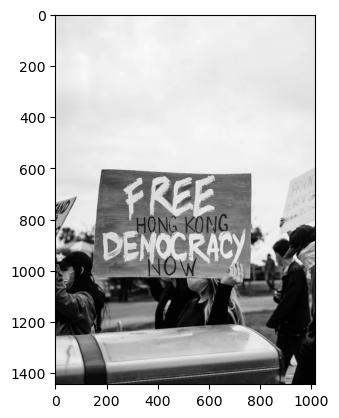

In [7]:
img = cv.imread('images/hong.png', 0) # читаем 1 канал
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5) # CV_8U для первого
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

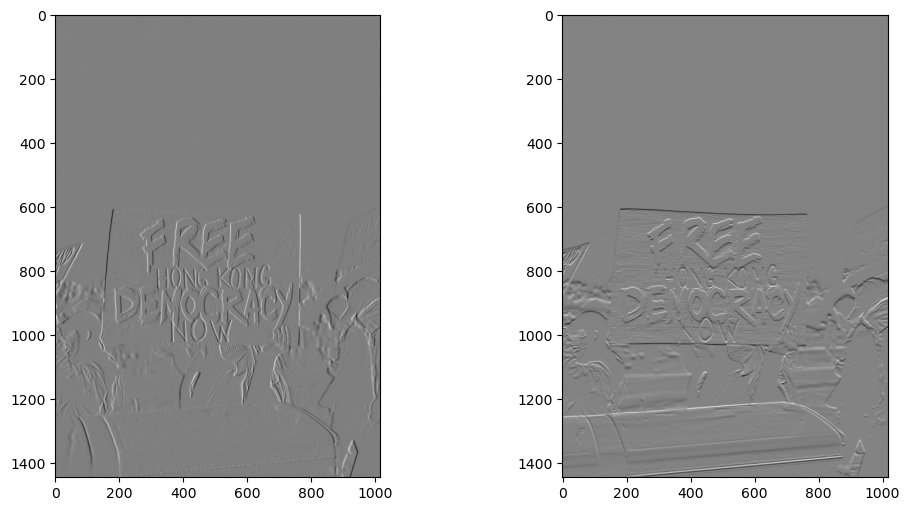

In [11]:
plot_compare(sobelx, sobely)

#### Task 1

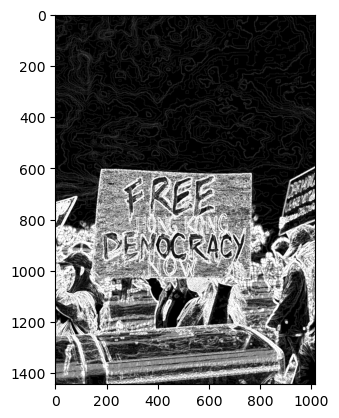

In [12]:
# https://github.com/Angileca/Sobel-edge-detection/blob/master/sobel%20edge%20detection%20from%20images.py
absx = cv.convertScaleAbs(sobelx)
absy = cv.convertScaleAbs(sobely)
edges = cv.addWeighted(absx, 0.5, absy, 0.5, 0)
plt.imshow(edges, cmap='gray')
plt.show()

#### Task 2

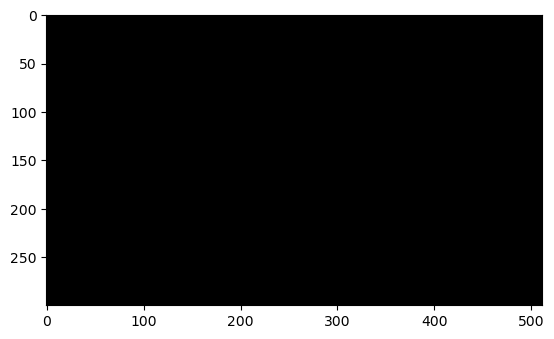

In [13]:
img = np.zeros((300, 512, 3), np.uint8)
plt.imshow(img)
plt.show()

In [10]:
# сначала тестим существующий функционал
def nothing(x):
    pass


# Create a black image, a window
img = np.zeros((300, 512, 3), np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('B', 'image', 0, 255, nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image', 0, 1, nothing)
do = True
while(do):
    cv.imshow('image', img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    try:
        r = cv.getTrackbarPos('R', 'image')
        g = cv.getTrackbarPos('G', 'image')
        b = cv.getTrackbarPos('B', 'image')
        s = cv.getTrackbarPos(switch, 'image')
        if s == 0:
            img[:] = 0
        else:
            img[:] = [b, g, r]
    except cv.error:
        do = False
        cv.destroyAllWindows()
cv.destroyAllWindows()

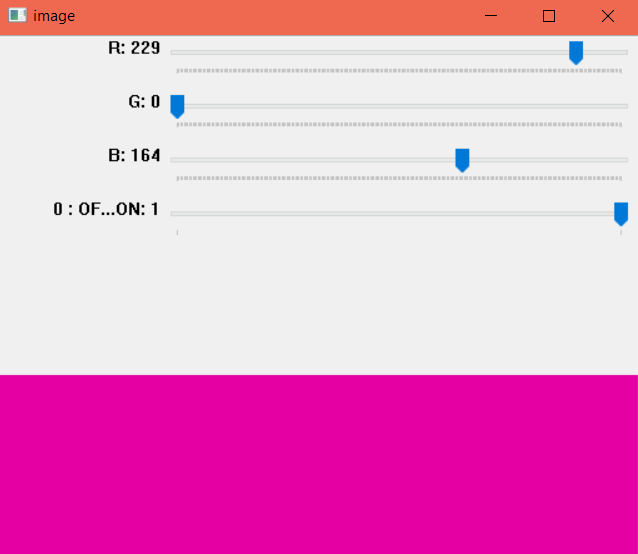

In [5]:
def nothing(x):
    pass


banner = cv.imread('images/hong.png', 0)
bS = cv.resize(banner, (508, 722))

cv.namedWindow('image', cv.WINDOW_NORMAL)

cv.createTrackbar('canny x', 'image', 0, 600, nothing)
cv.createTrackbar('canny y', 'image', 0, 600, nothing)

switch = '0:OFF \n 1:ON'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

do = True
while(do):
    cv.imshow('image', bS)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    try: 
        change_x = cv.getTrackbarPos('canny x', 'image')
        change_y = cv.getTrackbarPos('canny y', 'image')
        onoff = cv.getTrackbarPos(switch, 'image')
        if onoff == 0:
            # continue
            banner = cv.imread('images/hong.png', 0)
            bS = cv.resize(banner, (508, 722))
        else:
            # img[:] = bS
            banner = cv.imread('images/hong.png', 0)
            bS = cv.resize(banner, (508, 722))
            bS = cv.Canny(bS, change_x, change_y, apertureSize=3)
    except cv.error:
        do = False
        cv.destroyAllWindows()
cv.destroyAllWindows()

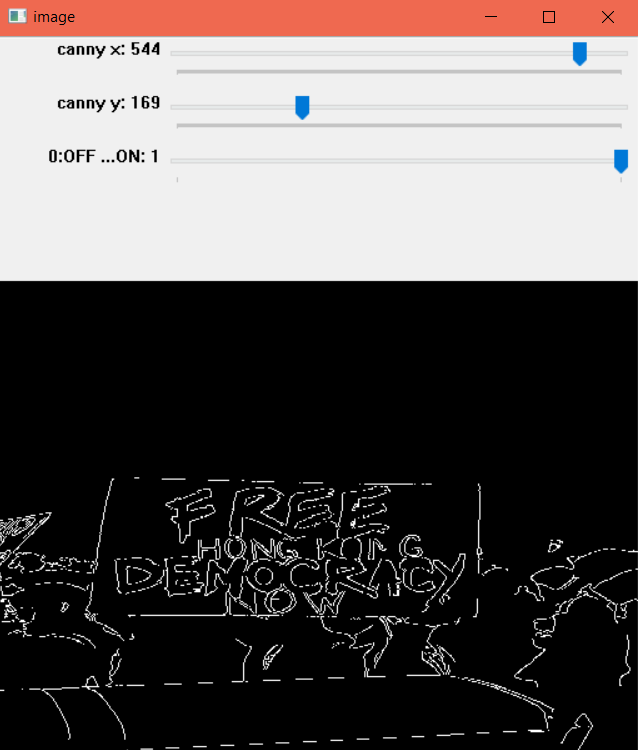

#### Task 3

Вариант с сохранением картинки

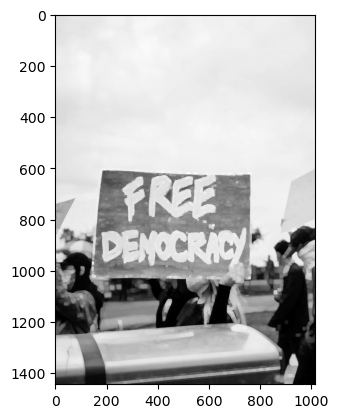

In [63]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv.dilate(img, kernel, iterations=2)
plt.imshow(dilation, cmap="gray")
plt.show()

Контрастный варианат

In [76]:
def areaFilter(minArea, inputImage):
    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
        cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage

In [84]:
inputImage = cv.imread('images/hong.png')

# Conversion to CMYK (just the K channel):
# Convert to float and divide by 255:
imgFloat = inputImage.astype(np.float) / 255.
# Calculate channel K:
kChannel = 1 - np.min(imgFloat, axis=2)
# Convert back to uint 8:
kChannel = (255 * kChannel).astype(np.uint8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


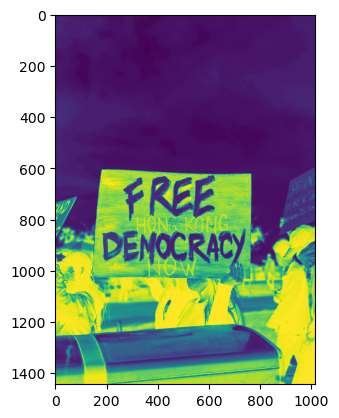

In [85]:
plt.imshow(kChannel)
plt.show()

In [86]:
# Threshold image:
binaryThresh = 100
_, binaryImage = cv2.threshold(kChannel, binaryThresh, 255, cv2.THRESH_BINARY)

In [87]:
minArea = 100
binaryImage = areaFilter(minArea, binaryImage)

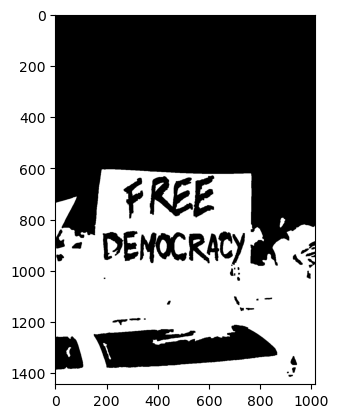

In [89]:
kernelSize = 3
opIterations = 2
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
binaryImage = cv2.morphologyEx(binaryImage, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

plt.imshow(binaryImage, cmap='gray')
plt.show()

### Prepractice

In [22]:
# img = cv.imread("assets/hong.png", 0)
# img = cv.imread("assets/bike.jpg", 0)
img = cv.imread("assets/sudoku.png", 0)

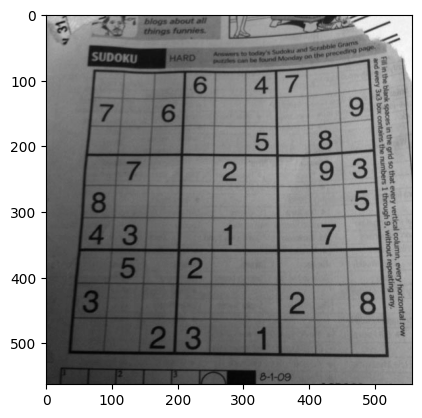

In [23]:
plt.imshow(img, cmap="gray")

In [24]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

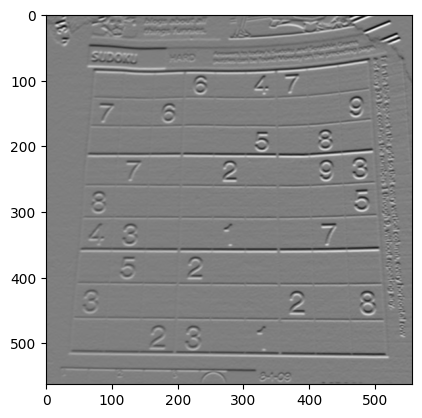

In [25]:
plt.imshow(sobely, cmap="gray")

In [26]:
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=5)

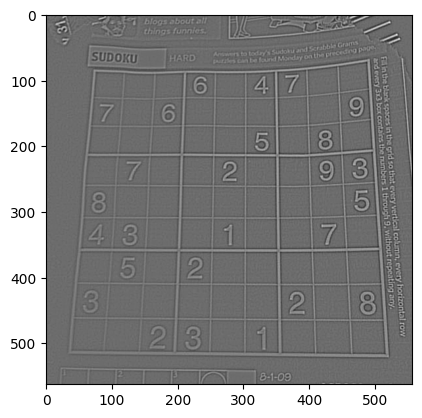

In [27]:
plt.imshow(laplacian, cmap="gray")

In [28]:
edges = cv.Canny(img, threshold1=100, threshold2=200, apertureSize=3)

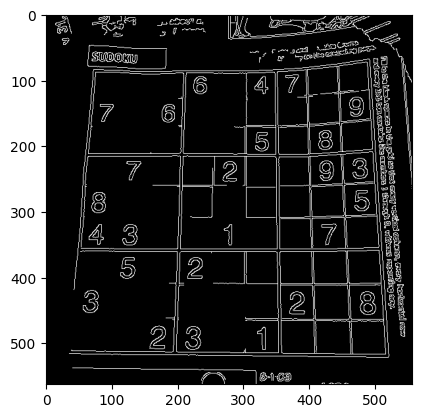

In [29]:
plt.imshow(edges, cmap="gray")